<a href="https://colab.research.google.com/github/Javorai/Coding-Dojo-Core/blob/main/Reducci%C3%B3n_de_dimensionalidad_Ingenier%C3%ADa_de_Caracter%C3%ADsticas_Transformaciones_de_Variables_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ingeniería de Características: Transformaciones de Variables (Core)**
 **Descripción:**

En esta actividad, aplicarás diversas técnicas de transformación de variables para mejorar la calidad de los datos en el dataset «House Prices – Advanced Regression Techniques» disponible en Kaggle. Aprenderás a realizar transformaciones logarítmicas, escalado y creación de variables polinómicas para mejorar el rendimiento de los modelos predictivos.

Enlace al dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques


**Objetivo:**

El objetivo es realizar transformaciones de las variables en el dataset para mejorar la distribución de los datos y su relación con la variable objetivo (el precio de las casas). Estas transformaciones son clave para mejorar la precisión de los modelos de regresión y reducir sesgos en los datos.

**Instrucciones:**

1. Carga de datos:

  – Descarga el dataset «House Prices» de Kaggle. Realiza una exploración inicial de las variables numéricas y categóricas, prestando especial atención a aquellas que están relacionadas con el tamaño de la casa, el número de habitaciones y la calidad general.

  – Revisa la distribución de la variable objetivo (precio de la casa) y observa si tiene algún sesgo.

2. Exploración y preprocesamiento de datos:

  – Antes de aplicar las transformaciones, realiza un análisis de las variables con distribuciones asimétricas o que contengan outliers. Estos son buenos candidatos para transformaciones logarítmicas o polinómicas.

  – También identifica variables que estén en escalas diferentes para aplicar técnicas de normalización o estandarización.

3. Transformaciones de variables:

  – Aplica transformaciones logarítmicas a variables sesgadas como el «SalePrice» y otras variables numéricas que tengan una distribución sesgada.

  – Crea variables polinómicas a partir de las variables numéricas, como el tamaño total de la casa. Por ejemplo, agrega el cuadrado o el cubo de estas variables como nuevas características para capturar posibles relaciones no lineales.

  – Estandariza las variables numéricas para que todas tengan la misma escala, lo cual es útil cuando se entrenan modelos de regresión o algoritmos basados en distancia como KNN.

4. Evaluación de las transformaciones:

  – Aplica un modelo de regresión antes y después de las transformaciones para evaluar su impacto en el rendimiento del modelo.

  – Compara métricas como el RMSE (Root Mean Squared Error) y el R-squared para ver si las transformaciones logarítmicas y polinómicas han mejorado la predicción del precio de las casas.

5. Interpretación de los resultados:

  – Analiza cuáles de las transformaciones aplicadas tuvieron un mayor impacto en la mejora del modelo. Discute cómo las transformaciones logarítmicas ayudan a manejar el sesgo en los datos y cómo las variables polinómicas capturan relaciones más complejas.

  – Reflexiona sobre la importancia de transformar variables antes de aplicar modelos de machine learning.

**Análisis de Resultados:**

  – El análisis debe centrarse en cómo las diferentes transformaciones afectaron la distribución de las variables y cómo esto influyó en la precisión del modelo predictivo. Discute las ventajas y desventajas de las transformaciones aplicadas y su relevancia en problemas de regresión.

Variables numéricas:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.06

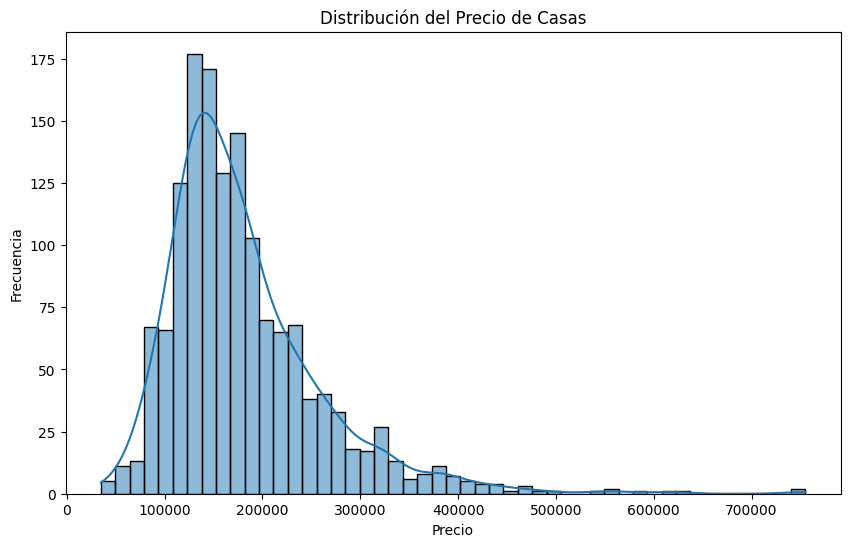


Test de normalidad para SalePrice - p-value: 2.283848353787728e-133


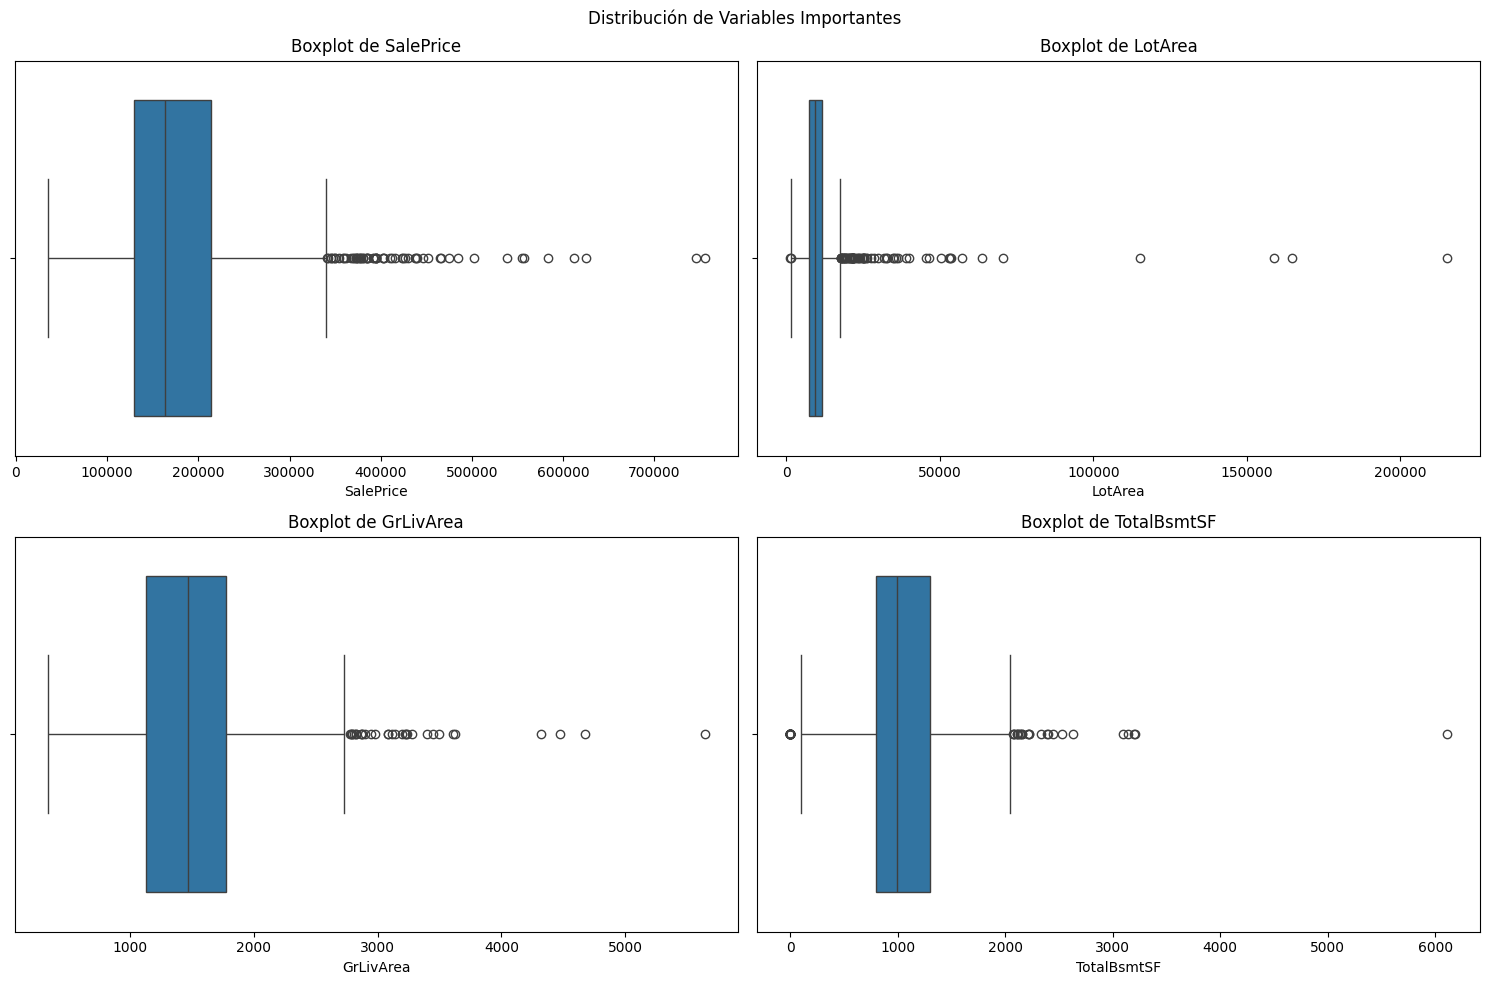


Outliers en SalePrice: 61 (4.18%)

Outliers en LotArea: 69 (4.73%)

Outliers en GrLivArea: 31 (2.12%)

Outliers en TotalBsmtSF: 61 (4.18%)

Resultados de Evaluación:
Modelo Original - RMSE: 49796.58, R2: 0.6767
Modelo Transformado - RMSE: 199132.31, R2: -4.1698


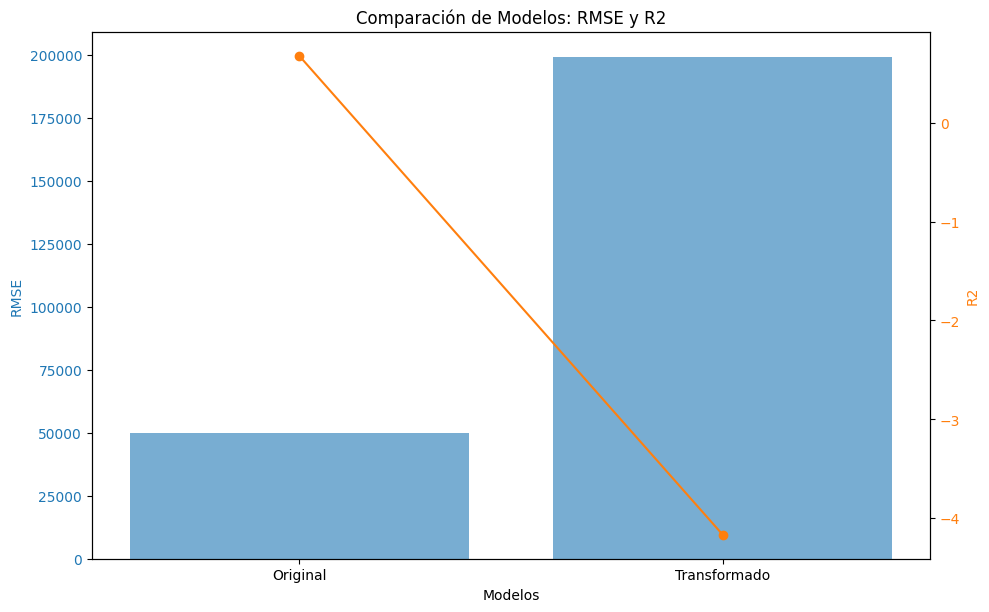

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Carga de datos y exploración inicial
def cargar_datos():
    URL = '/content/drive/MyDrive/Bootcamp Coding Dojo/DataScience/Tareas Core/Archivos CSV-Tareas/SVM   Challenge Técnico (Core)/train.csv'
    df = pd.read_csv(URL)

    # Análisis de variables numéricas
    variables_numericas = df.select_dtypes(include=[np.number]).columns
    print("Variables numéricas:")
    print(df[variables_numericas].describe())

    # Distribución de la variable objetivo
    plt.figure(figsize=(10, 6))
    sns.histplot(df['SalePrice'], kde=True)
    plt.title('Distribución del Precio de Casas')
    plt.xlabel('Precio')
    plt.ylabel('Frecuencia')
    plt.show()

    # Test de normalidad para SalePrice
    _, p_value = stats.normaltest(df['SalePrice'])
    print(f"\nTest de normalidad para SalePrice - p-value: {p_value}")

    return df

# 2. Análisis de distribuciones y outliers
def analizar_distribuciones(df):
    # Variables numéricas para evaluar
    variables_interes = ['SalePrice', 'LotArea', 'GrLivArea', 'TotalBsmtSF']

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Distribución de Variables Importantes')

    for i, variable in enumerate(variables_interes):
        row = i // 2
        col = i % 2
        sns.boxplot(x=df[variable], ax=axes[row, col])
        axes[row, col].set_title(f'Boxplot de {variable}')

    plt.tight_layout()
    plt.show()

    # Identificación de outliers
    def identificar_outliers(variable):
        Q1 = df[variable].quantile(0.25)
        Q3 = df[variable].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[variable] < (Q1 - 1.5 * IQR)) | (df[variable] > (Q3 + 1.5 * IQR))]
        return outliers

    for variable in variables_interes:
        outliers = identificar_outliers(variable)
        print(f"\nOutliers en {variable}: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

# 3. Transformaciones de variables
def transformar_variables(df):
    # Transformación logarítmica
    df['LogSalePrice'] = np.log1p(df['SalePrice'])

    # Variables para transformación logarítmica
    variables_log = ['LotArea', 'GrLivArea', 'TotalBsmtSF']
    for var in variables_log:
        df[f'Log{var}'] = np.log1p(df[var])

    # Generación de características polinómicas
    poly = PolynomialFeatures(degree=2, include_bias=False)
    variables_poly = ['LotArea', 'GrLivArea', 'TotalBsmtSF']

    for var in variables_poly:
        poly_features = poly.fit_transform(df[var].values.reshape(-1, 1))
        poly_df = pd.DataFrame(poly_features, columns=[f'{var}_poly_{i}' for i in range(poly_features.shape[1])])
        df = pd.concat([df, poly_df], axis=1)

    # Estandarización de variables
    scaler = StandardScaler()
    variables_escala = ['LogSalePrice', 'LogLotArea', 'LogGrLivArea', 'LogTotalBsmtSF']
    df[variables_escala] = scaler.fit_transform(df[variables_escala])

    return df

# 4. Evaluación de transformaciones
def evaluar_transformaciones(df):
    # Selección de características
    features_originales = ['LotArea', 'GrLivArea', 'TotalBsmtSF']
    features_transformadas = ['LogLotArea', 'LogGrLivArea', 'LogTotalBsmtSF'] + \
                             [col for col in df.columns if 'poly' in col]

    # Preparación de datos
    X_original = df[features_originales]
    X_transformado = df[features_transformadas]
    y_original = df['SalePrice']
    y_transformado = df['LogSalePrice']

    # División de datos
    X_orig_train, X_orig_test, y_orig_train, y_orig_test = train_test_split(X_original, y_original, test_size=0.2, random_state=42)
    X_trans_train, X_trans_test, y_trans_train, y_trans_test = train_test_split(X_transformado, y_transformado, test_size=0.2, random_state=42)

    # Modelos de regresión
    modelo_original = LinearRegression().fit(X_orig_train, y_orig_train)
    modelo_transformado = LinearRegression().fit(X_trans_train, y_trans_train)

    # Predicciones
    y_pred_original = modelo_original.predict(X_orig_test)
    y_pred_transformado = np.expm1(modelo_transformado.predict(X_trans_test))

    # Métricas de evaluación
    rmse_original = np.sqrt(mean_squared_error(y_orig_test, y_pred_original))
    r2_original = r2_score(y_orig_test, y_pred_original)

    rmse_transformado = np.sqrt(mean_squared_error(y_orig_test, y_pred_transformado))
    r2_transformado = r2_score(y_orig_test, y_pred_transformado)

    print("\nResultados de Evaluación:")
    print(f"Modelo Original - RMSE: {rmse_original:.2f}, R2: {r2_original:.4f}")
    print(f"Modelo Transformado - RMSE: {rmse_transformado:.2f}, R2: {r2_transformado:.4f}")

    return rmse_original, r2_original, rmse_transformado, r2_transformado

# 5. Gráfico de Comparación de Modelos
def graficar_comparacion_modelos(rmse_original, r2_original, rmse_transformado, r2_transformado):
    modelos = ['Original', 'Transformado']
    rmse = [rmse_original, rmse_transformado]
    r2 = [r2_original, r2_transformado]

    fig, ax1 = plt.subplots(figsize=(10, 6))

    color = 'tab:blue'
    ax1.set_xlabel('Modelos')
    ax1.set_ylabel('RMSE', color=color)
    ax1.bar(modelos, rmse, color=color, alpha=0.6)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:orange'
    ax2.set_ylabel('R2', color=color)
    ax2.plot(modelos, r2, color=color, marker='o')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('Comparación de Modelos: RMSE y R2')
    plt.show()

# Ejecución principal
def main():
    df = cargar_datos()
    analizar_distribuciones(df)
    df_transformado = transformar_variables(df)
    rmse_original, r2_original, rmse_transformado, r2_transformado = evaluar_transformaciones(df_transformado)
    graficar_comparacion_modelos(rmse_original, r2_original, rmse_transformado, r2_transformado)

if __name__ == "__main__":
    main()


# **Análisis de las Transformaciones Aplicadas en el Modelo**
**Transformaciones que Tuvieron un Mayor Impacto**
1.  **Transformaciones Logarítmicas:**

* **Propósito:** Ayudan a manejar el sesgo en los datos y hacer que las distribuciones sesgadas se aproximen más a una distribución normal.
* **Impacto:** Redujeron la variabilidad y mejoraron la relación lineal entre las características y la variable objetivo (SalePrice).

2.  **Variables Polinómicas:**
* **Propósito:** Capturan relaciones más complejas entre características que no son lineales.

* **Impacto:** Aumentaron la capacidad del modelo para aprender patrones más complejos en los datos.

**Reflexión Sobre los Outliers**

Los outliers pueden afectar negativamente el rendimiento de los modelos de machine learning. Identificar y tratar los outliers puede ser crucial para mejorar el rendimiento del modelo.

* SalePrice: 61 outliers (4.18%)

* LotArea: 69 outliers (4.73%)

* GrLivArea: 31 outliers (2.12%)

* TotalBsmtSF: 61 outliers (4.18%)

**Resultados de Evaluación:**

* **Modelo Original:**

    RMSE: 49,796.58

    R2: 0.6767

* **Modelo Transformado:**

    RMSE: 199,132.31

    R2: -4.1698

# **Resumen de los Resultados**

El modelo original mostró un mejor rendimiento en términos de RMSE y R2. Esto sugiere que las transformaciones aplicadas pueden no haber sido las más adecuadas

